In [1]:
import torch
from torchdrug import data, datasets

dataset = datasets.ClinTox("~/molecule-datasets/")
lengths = [int(0.8 * len(dataset)), int(0.1 * len(dataset))]
lengths += [len(dataset) - sum(lengths)]
train_set, valid_set, test_set = torch.utils.data.random_split(dataset, lengths)

Loading /home/tangwuguo/molecule-datasets/clintox.csv: 100%|████████████████████████████████████████████████████████████████████████████████████████| 1485/1485 [00:00<00:00, 49009.67it/s]
Constructing molecules from SMILES:   0%|                                                                                                                         | 0/1484 [00:00<?, ?it/s]/homeb/tangwuguo/miniconda3/envs/cbc23/lib/python3.8/site-packages/torchdrug/data/feature.py:42: UserWarning: Unknown value `*`
  warnings.warn("Unknown value `%s`" % x)
[20:48:30] Explicit valence for atom # 0 N, 5, is greater than permitted
/homeb/tangwuguo/miniconda3/envs/cbc23/lib/python3.8/site-packages/torchdrug/data/feature.py:42: UserWarning: Unknown value `Tc`
  warnings.warn("Unknown value `%s`" % x)
/homeb/tangwuguo/miniconda3/envs/cbc23/lib/python3.8/site-packages/torchdrug/data/feature.py:42: UserWarning: Unknown value `Fe`
  warnings.warn("Unknown value `%s`" % x)
/homeb/tangwuguo/miniconda3/envs/cbc23/l

In [2]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

/homeb/tangwuguo/miniconda3/envs/cbc23/lib/python3.8/site-packages/torchdrug/data/molecule.py:1031: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


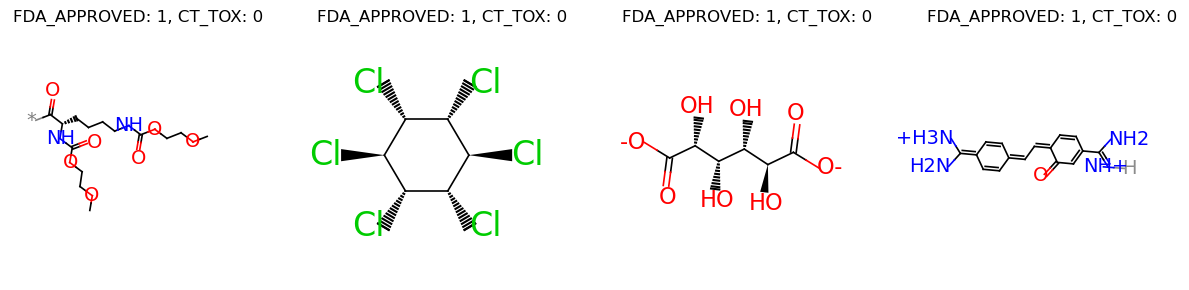

In [3]:
graphs = []
labels = []
for i in range(4):
    sample = dataset[i]
    graphs.append(sample.pop("graph"))
    label = ["%s: %d" % (k, v) for k, v in sample.items()]
    label = ", ".join(label)
    labels.append(label)
graph = data.Molecule.pack(graphs)
graph.visualize(labels, num_row=1)

In [2]:
from torchdrug import core, models, tasks, utils

model = models.GIN(input_dim=dataset.node_feature_dim,
                   hidden_dims=[256, 256, 256, 256],  # 4 layers
                   short_cut=True,  # res connect
                   batch_norm=True,
                   concat_hidden=True)
task = tasks.PropertyPrediction(model, task=dataset.tasks,
                                criterion="bce", metric=("auprc", "auroc"))


In [3]:
optimizer = torch.optim.Adam(task.parameters(), lr=1e-3)
solver = core.Engine(task, train_set, valid_set, test_set, optimizer,
                     gpus=[0], batch_size=128)
solver.train(num_epoch=100)
solver.evaluate("valid")

20:49:22   Preprocess training set
20:49:26   {'batch_size': 128,
 'class': 'core.Engine',
 'gpus': [0],
 'gradient_interval': 1,
 'log_interval': 100,
 'logger': 'logging',
 'num_worker': 0,
 'optimizer': {'amsgrad': False,
               'betas': (0.9, 0.999),
               'class': 'optim.Adam',
               'eps': 1e-08,
               'lr': 0.001,
               'weight_decay': 0},
 'scheduler': None,
 'task': {'class': 'tasks.PropertyPrediction',
          'criterion': 'bce',
          'graph_construction_model': None,
          'metric': ('auprc', 'auroc'),
          'model': {'activation': 'relu',
                    'batch_norm': True,
                    'class': 'models.GIN',
                    'concat_hidden': True,
                    'edge_input_dim': None,
                    'eps': 0,
                    'hidden_dims': [256, 256, 256, 256],
                    'input_dim': 66,
                    'learn_eps': False,
                    'num_mlp_layer': 2,
          

20:49:26   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
20:49:26   Epoch 0 begin
20:49:28   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
20:49:28   binary cross entropy: 5.13553
20:49:28   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
20:49:28   Epoch 0 end
20:49:28   duration: 2.30 secs
20:49:28   speed: 4.36 batch / sec
20:49:28   ETA: 3.79 mins
20:49:28   max GPU memory: 119.2 MiB
20:49:28   ------------------------------
20:49:28   average binary cross entropy: 3.09621
20:49:28   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
20:49:28   Epoch 1 begin
20:49:29   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
20:49:29   Epoch 1 end
20:49:29   duration: 0.39 secs
20:49:29   speed: 25.35 batch / sec
20:49:29   ETA: 2.20 mins
20:49:29   max GPU memory: 114.2 MiB
20:49:29   ------------------------------
20:49:29   average binary cross entropy: 1.53448
20:49:29   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
20:49:29   Epoch 2 begin
20:49:29   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
20:49:29   Epoch 2 end
20:49:29   duration: 0.35 secs
20:49:29   speed: 28.25 batch / sec
20:49:29   ET

20:49:37   duration: 0.45 secs
20:49:37   speed: 22.37 batch / sec
20:49:37   ETA: 38.25 secs
20:49:37   max GPU memory: 113.3 MiB
20:49:37   ------------------------------
20:49:37   average binary cross entropy: 0.137446
20:49:37   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
20:49:37   Epoch 23 begin
20:49:38   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
20:49:38   Epoch 23 end
20:49:38   duration: 0.35 secs
20:49:38   speed: 28.62 batch / sec
20:49:38   ETA: 37.29 secs
20:49:38   max GPU memory: 117.9 MiB
20:49:38   ------------------------------
20:49:38   average binary cross entropy: 0.171677
20:49:38   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
20:49:38   Epoch 24 begin
20:49:38   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
20:49:38   Epoch 24 end
20:49:38   duration: 0.36 secs
20:49:38   speed: 27.58 batch / sec
20:49:38   ETA: 36.42 secs
20:49:38   max GPU memory: 115.2 MiB
20:49:38   ------------------------------
20:49:38   average binary cross entropy: 0.305594
20:49:38   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
20:49:38   Epoch 25 b

20:49:46   average binary cross entropy: 0.208229
20:49:46   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
20:49:46   Epoch 45 begin
20:49:46   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
20:49:46   Epoch 45 end
20:49:46   duration: 0.35 secs
20:49:46   speed: 28.97 batch / sec
20:49:46   ETA: 23.83 secs
20:49:46   max GPU memory: 112.8 MiB
20:49:46   ------------------------------
20:49:46   average binary cross entropy: 0.150316
20:49:46   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
20:49:46   Epoch 46 begin
20:49:47   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
20:49:47   Epoch 46 end
20:49:47   duration: 0.44 secs
20:49:47   speed: 22.97 batch / sec
20:49:47   ETA: 23.38 secs
20:49:47   max GPU memory: 116.5 MiB
20:49:47   ------------------------------
20:49:47   average binary cross entropy: 0.217562
20:49:47   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
20:49:47   Epoch 47 begin
20:49:47   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
20:49:47   Epoch 47 end
20:49:47   duration: 0.47 secs
20:49:47   speed: 21.30 batch / sec
20:49:47   ETA: 22.97 secs
20:49:47

20:49:55   duration: 0.33 secs
20:49:55   speed: 30.04 batch / sec
20:49:55   ETA: 13.68 secs
20:49:55   max GPU memory: 111.9 MiB
20:49:55   ------------------------------
20:49:55   average binary cross entropy: 0.0672061
20:49:55   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
20:49:55   Epoch 68 begin
20:49:55   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
20:49:55   Epoch 68 end
20:49:55   duration: 0.40 secs
20:49:55   speed: 24.91 batch / sec
20:49:55   ETA: 13.24 secs
20:49:55   max GPU memory: 115.4 MiB
20:49:55   ------------------------------
20:49:55   average binary cross entropy: 0.111156
20:49:55   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
20:49:55   Epoch 69 begin
20:49:56   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
20:49:56   Epoch 69 end
20:49:56   duration: 0.44 secs
20:49:56   speed: 22.50 batch / sec
20:49:56   ETA: 12.82 secs
20:49:56   max GPU memory: 117.8 MiB
20:49:56   ------------------------------
20:49:56   average binary cross entropy: 0.0851183
20:49:56   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
20:49:56   Epoch 70

20:50:04   average binary cross entropy: 0.094867
20:50:04   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
20:50:04   Epoch 90 begin
20:50:04   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
20:50:04   binary cross entropy: 0.0366422
20:50:04   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
20:50:04   Epoch 90 end
20:50:04   duration: 0.47 secs
20:50:04   speed: 21.31 batch / sec
20:50:04   ETA: 3.81 secs
20:50:04   max GPU memory: 109.5 MiB
20:50:04   ------------------------------
20:50:04   average binary cross entropy: 0.0667509
20:50:04   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
20:50:04   Epoch 91 begin
20:50:05   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
20:50:05   Epoch 91 end
20:50:05   duration: 0.33 secs
20:50:05   speed: 29.86 batch / sec
20:50:05   ETA: 3.38 secs
20:50:05   max GPU memory: 112.7 MiB
20:50:05   ------------------------------
20:50:05   average binary cross entropy: 0.148294
20:50:05   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
20:50:05   Epoch 92 begin
20:50:05   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
20:50:05   Epoch 92 end
20:50:05   duratio

{'auprc [FDA_APPROVED]': tensor(0.9973, device='cuda:0'),
 'auprc [CT_TOX]': tensor(0.7290, device='cuda:0'),
 'auroc [FDA_APPROVED]': tensor(0.9108, device='cuda:0'),
 'auroc [CT_TOX]': tensor(0.8469, device='cuda:0')}

/homeb/tangwuguo/miniconda3/envs/cbc23/lib/python3.8/site-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/homeb/tangwuguo/miniconda3/envs/cbc23/lib/python3.8/site-packages/torchdrug/data/molecule.py:1031: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


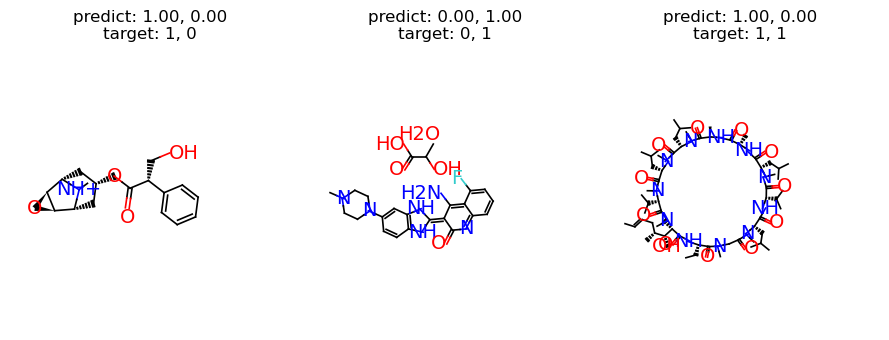

In [6]:
from torch.nn import functional as F

samples = []
categories = set()
for sample in valid_set:
    category = tuple([v for k, v in sample.items() if k != "graph"])
    if category not in categories:
        categories.add(category)
        samples.append(sample)
samples = data.graph_collate(samples)
samples = utils.cuda(samples)

preds = F.sigmoid(task.predict(samples))
targets = task.target(samples)

titles = []
for pred, target in zip(preds, targets):
    pred = ", ".join(["%.2f" % p for p in pred])
    target = ", ".join(["%d" % t for t in target])
    titles.append("predict: %s\ntarget: %s" % (pred, target))
graph = samples["graph"]
graph.visualize(titles, figure_size=(3, 3.5), num_row=1)

In [ ]:
preds